# The Sierpinski triangle

In [1]:
import random
from operator import add

# import libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

rc('animation', html='jshtml')

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def make_animation(sierpinski_triangle: list):
    num_points = len(sierpinski_triangle)
    points_split = list(zip(*sierpinski_triangle))
    xx, yy = points_split[0], points_split[1]
    fig = plt.figure(figsize=(10, 10))

    def init():
        ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        ax.set_axis_off()
        return ax.plot(xx, yy, "g.")

    def animate(i):
        scale = 1 - i * 0.02  # calculate the new scale
        ax = plt.axes(xlim=(0, scale), ylim=(0, scale))
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        ax.set_axis_off()
        return ax.plot(xx, yy, "g.")

    anim = animation.FuncAnimation(
        fig, animate, init_func=init, frames=50, interval=200, blit=False)
    anim.save(f"sierpinski_{num_points}.gif", writer="pillow")

    plt.show()

In [3]:
def generate_sierpinski_triangle(n: int):
  sierpinski_triangle = []  # final list of points

  # initial points
  A = (0.0, 0.0)
  B = (0.5, 1.0)
  C = (1.0, 0.0)
  triangle_vertices = [A, B, C]

  # starting point
  moving_point = random.choice(triangle_vertices)

  for i in range(n):
    offset_point = random.choice(triangle_vertices)
    moving_point = list(map(lambda x: x / 2.0, list(map(add, moving_point, offset_point))))
    sierpinski_triangle.append(moving_point.copy())

  make_animation(sierpinski_triangle)

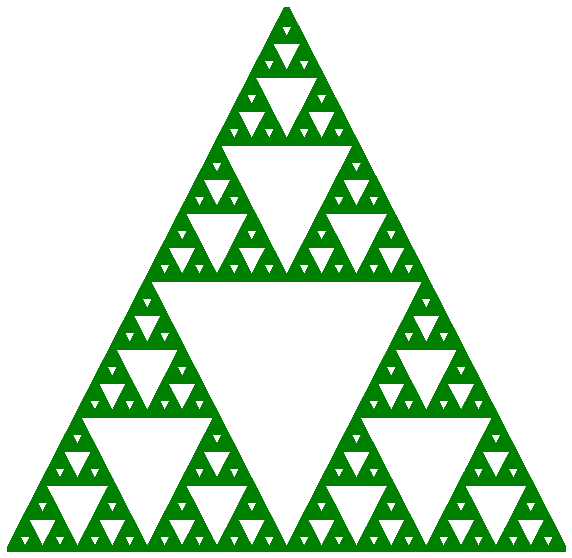

In [4]:
generate_sierpinski_triangle(2000000)